![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<div style="font-family: Times New Roman; font-size: 1.0em;">

<b>Questão 1:</b> <br>

a) Faça gráficos dos estados estacionários (X ∞ (V )) e das constantes de tempo (τ X (V ))
versus V para as variáveis de gating do modelo de Connor e Stevens (X = {n, m, h, a, b}) <br>
</div>

In [1]:
import numpy as np
import pylab as plt
from matplotlib import cm

from Connor_Stevens import ConnorStevens

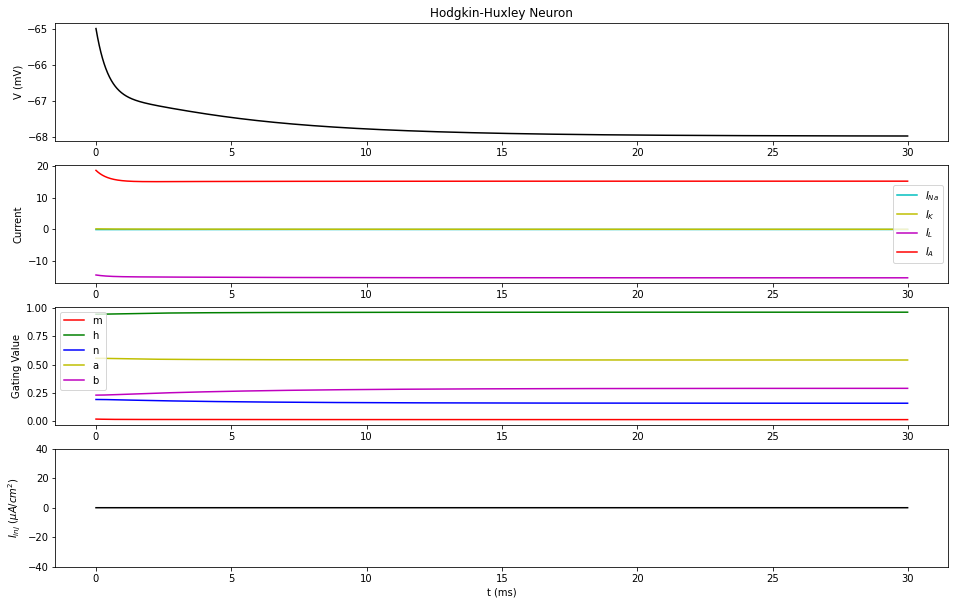

In [2]:
runner = ConnorStevens(exp_time=30)
_ = runner.run(J=[0], times=[(0, 0)])


<div style="font-family: Times New Roman; font-size: 1.0em;">
b) Use as condições iniciais dadas por Ermentrout: V (0) = −67, 976 mV; n(0) = 0, 1558;
m(0) = 0, 01; h(0) = 0, 965; a(0) = 0, 5404; e b(0) = 0, 2885. Resolva o sistema de EDOs
do modelo de Connor e Stevens usando o método de Runge-Kutta de quarta ordem
com passo de tempo de 0,01 ms. Simule as equações do modelo de Connor-Stevens por
um perı́odo de 200 ms começando das condições iniciais dadas acima e em t = 60 ms
injete uma densidade de corrente J pelos restantes 140 ms. Faça isso para quatro valores
diferentes de J: 5, 10, 15 e 20 µA/cm 2 . Faça gráficos de V , n, m, h, a e b em função de
t para essas quatro densidades de corrente injetada. <br>
</div>

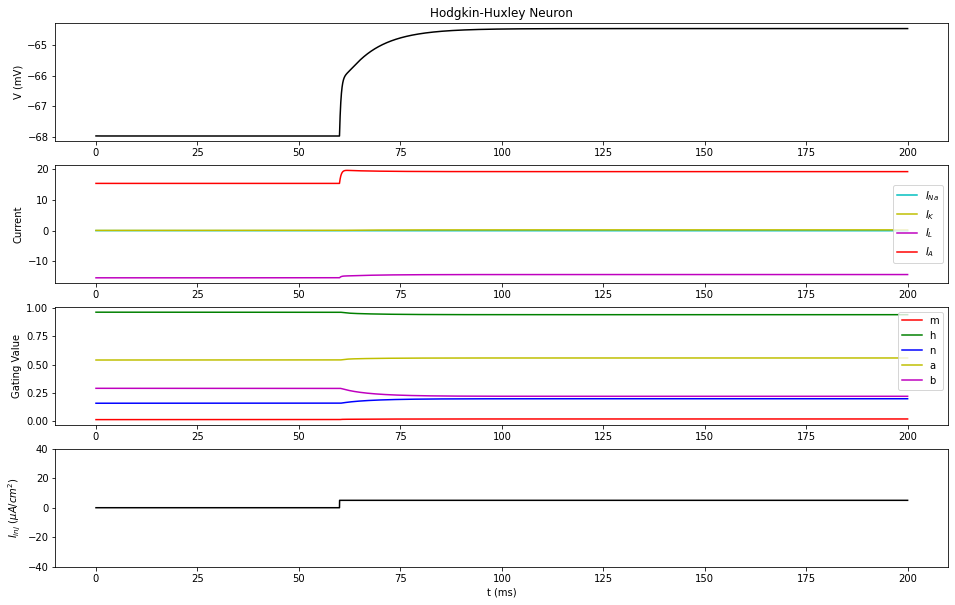

Inj current: 5


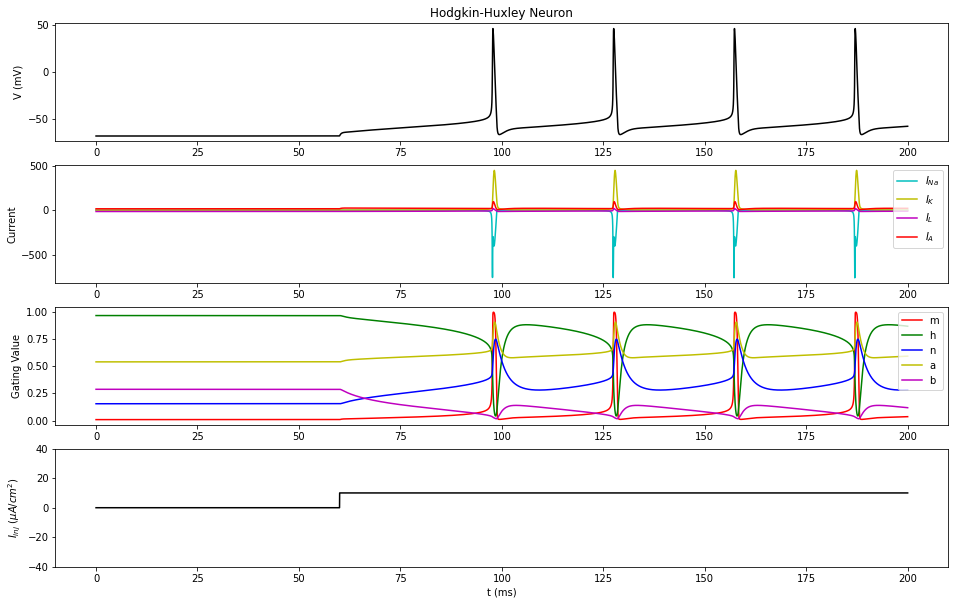

Inj current: 10


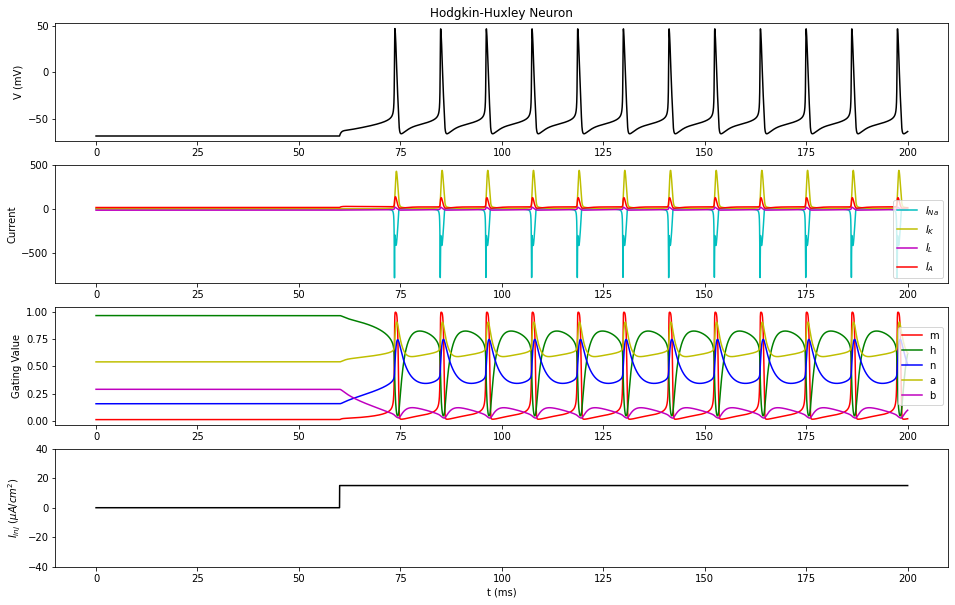

Inj current: 15


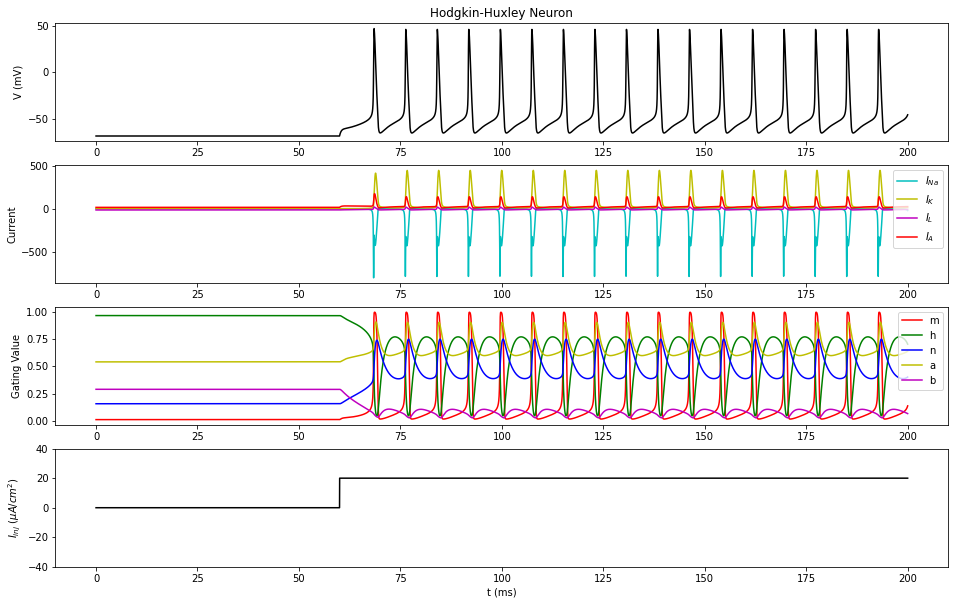

Inj current: 20


In [3]:
runner = ConnorStevens(exp_time=200)

for j in range(5, 25, 5):
    _ = runner.run(J=[j], times=[(60, 200)], V0=-67.976)
    print(f"Inj current: {j}")


<div style="font-family: Times New Roman; font-size: 1.0em;">
c) Calcule a taxa de disparos do modelo (dividindo o número de disparos pelos 140 ms de
corrente aplicada) para densidades de corrente variando de 8 a 10 µA/cm² em passos
de 0,2 µA/cm² e produza um gráfico f-I com os valores obtidos. Como o gráfico f-I se
compara com o gráfico f-I do modelo de Hodgkin-Huxley construı́do na primeira lista? <br>

Em termos de comportamento geral deste gráfico f-I, o modelo de Connor-Stevens permanece basicamente o mesmo, a quantidade de disparos irá aumentar até um limite máximo e depois não haverá mais disparos.
</div>

In [4]:
def get_number_of_action_potencial(V):
    """Get number of action potentials.

    Parameters
    ----------
    V : array
    The return from Connor & Stevens run Voltage vector.
    """
    V_threshold = V[V > 40]
    asign = np.sign(V_threshold[:-1] - V_threshold[1:])
    signchange = ((np.roll(asign, 1) - asign) != 0).astype(int)
    return len(signchange[signchange == 1]) / 2

In [5]:
runner = ConnorStevens(exp_time=200)

current_inj = np.arange(8, 10.1, 0.2)
all_activation_potencials = []

for j in current_inj:
    V, m, h, n, ina, ik, il, ia, i_inj_values = runner.run(
        J=[j], times=[(60, 200)], V0=-67.976, plot=False
    )
    all_activation_potencials.append(get_number_of_action_potencial(V))

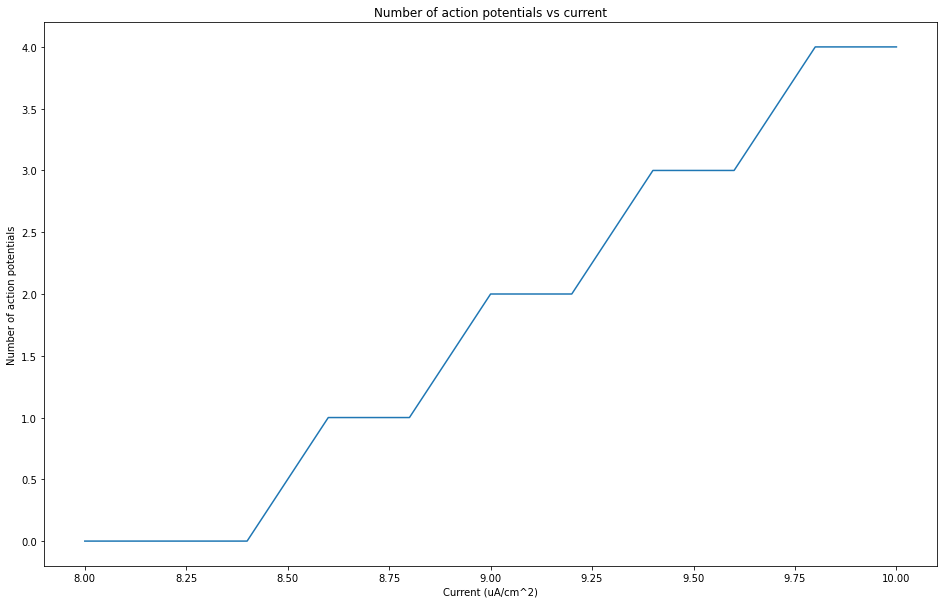

The max number of action potencials was 4.0 Hz
The min number of action potencials was 0.0 Hz


In [6]:
plt.figure(figsize=(16, 10))
plt.plot(current_inj, np.array(all_activation_potencials))
plt.xlabel("Current (uA/cm^2)")
plt.ylabel("Number of action potentials")
plt.title("Number of action potentials vs current")
plt.show()
print(f"The max number of action potencials was {max(all_activation_potencials)} Hz")
print(f"The min number of action potencials was {min(all_activation_potencials)} Hz")


<div style="font-family: Times New Roman; font-size: 1.0em;">
d) Outra maneira de determinar a taxa de disparos de um neurônio em resposta a uma
corrente é calculando o tempo entre o inı́cio do estı́mulo e o primeiro disparo do neurônio
(chamado de latência do primeiro disparo). A taxa de disparos neste caso é dada pelo
inverso da latência do primeiro disparo. Determine a curva f-I para o modelo de Connor-
Stevens por esse método para as mesmas correntes usadas no item anterior.
</div>

In [7]:
def get_number_of_action_potencial_by_time(V):
    """Get number of action potentials.

    Parameters
    ----------
    V : array
    The return from Connor & Stevens run Voltage vector.
    """
    asign = np.sign(V[:-1] - V[1:])
    signchange = ((np.roll(asign, 1) - asign) != 0).astype(int)

    try:
        max_curent_idx = np.where(signchange == 1)[0][2]

        latency = max_curent_idx / 100 - 60
    except:
        latency = 0

    return latency if latency == 0 else 1 / latency


def get_number_of_action_potencial(V, threshold=0.0):
    """Get number of action potentials.

    Parameters
    ----------
    V : array
    The return from Connor & Stevens run Voltage vector.
    threshold : float
    The threshold voltage.
    """
    actions = np.where((V[1:] >= threshold) & (V[:-1] <= threshold))[0]

    return actions, len(actions)

In [8]:
runner = ConnorStevens(exp_time=200)

current_inj = np.arange(8, 10.1, 0.2)
all_activation_potencials = []

for j in current_inj:
    V, m, h, n, ina, ik, il, ia, i_inj_values = runner.run(
        J=[j], times=[(60, 200)], V0=-67.976, plot=False
    )
    all_activation_potencials.append(get_number_of_action_potencial_by_time(V))

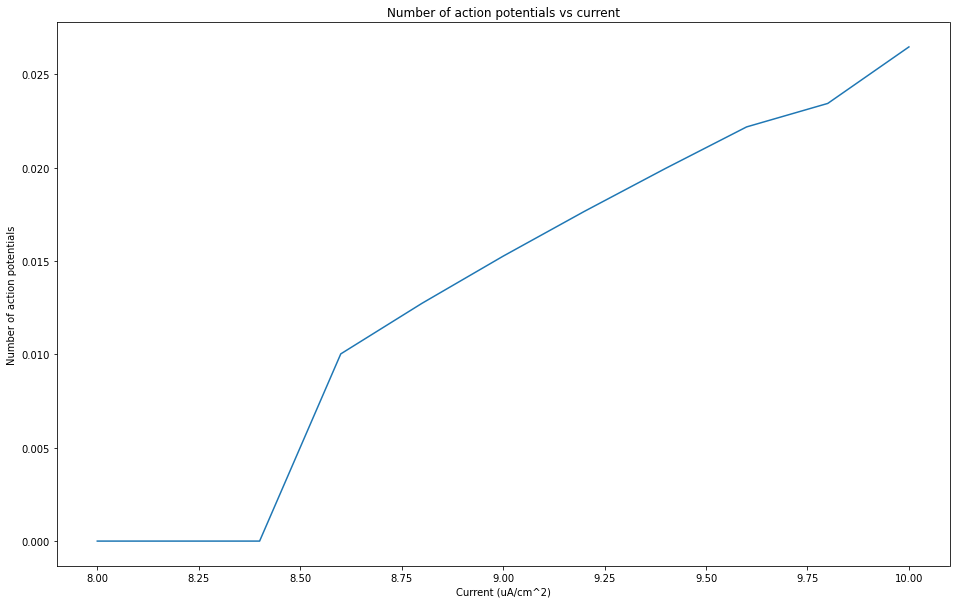

The max number of action potencials was 0.026462026991267526 Hz
The min number of action potencials was 0 Hz


In [9]:
plt.figure(figsize=(16, 10))
plt.plot(current_inj, np.array(all_activation_potencials))
plt.xlabel("Current (uA/cm^2)")
plt.ylabel("Number of action potentials")
plt.title("Number of action potentials vs current")
plt.show()
print(f"The max number of action potencials was {max(all_activation_potencials)} Hz")
print(f"The min number of action potencials was {min(all_activation_potencials)} Hz")


<div style="font-family: Times New Roman; font-size: 1.0em;">
e) Em t = 60 ms, aplique uma densidade de corrente negativa igual a J = −50 µA/cm 2 por
5 ms (um pulso de corrente negativa) e, em seguida, aplique uma densidade de corrente
constante positiva de J = 20 µA/cm 2 até o fim da simulação. Faça o gráfico de V versus
t para esse caso.
</div>

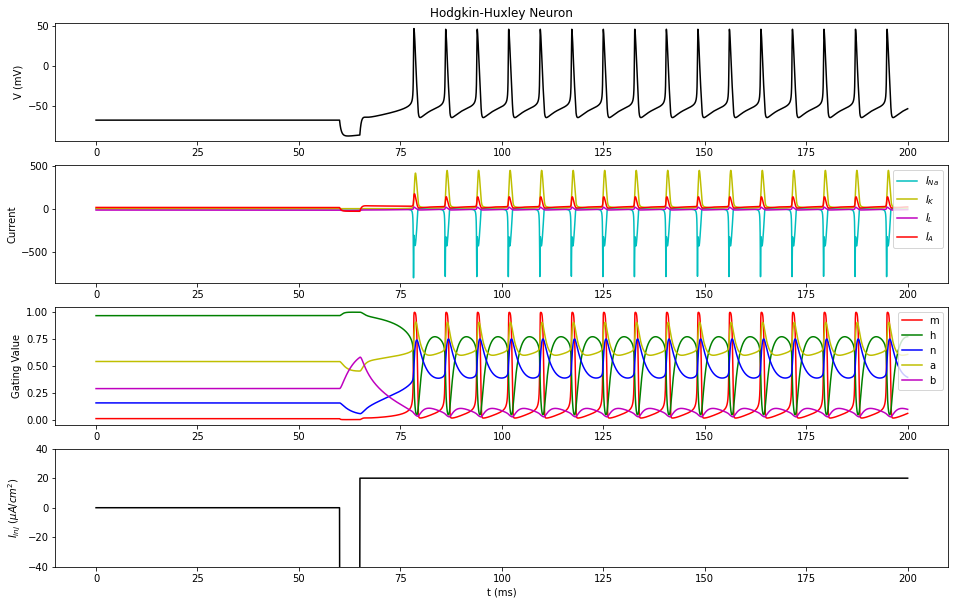

In [10]:
runner = ConnorStevens(exp_time=200)

_ = runner.run(J=[-50.0, 20.0], times=[(60, 65), (65, 200)], V0=-67.976)


<div style="font-family: Times New Roman; font-size: 1.0em;">
f) Multiplique o termo do lado direito da equação (6) para db/dt por 0,25 para tornar a
inativação da corrente A mais lenta. Injete uma densidade de corrente J = 15 µA/cm 2 e
faça o gráfico de V versus t. Observe que agora a latência do primeiro disparo torna-se
muito longa, mas o intervalo entre disparos é bem pequeno. Explique o motivo disso. <br>

Tal efeito apurado é devido ao fato de que ao adicionarmos uma escala de 1/4 ao canal de inativação de A deixamos 25% mais lenta a entrada de cálcio ná célula, o que causa o primeiro efeito de tardeamento do primeiro potencial de ação. Porém após a pssagem do limiar a quantidade de Ca2+ dentro da célula permanece praticamente constante, o que permite a subsequencia dos demais potenciais de ação.
</div>

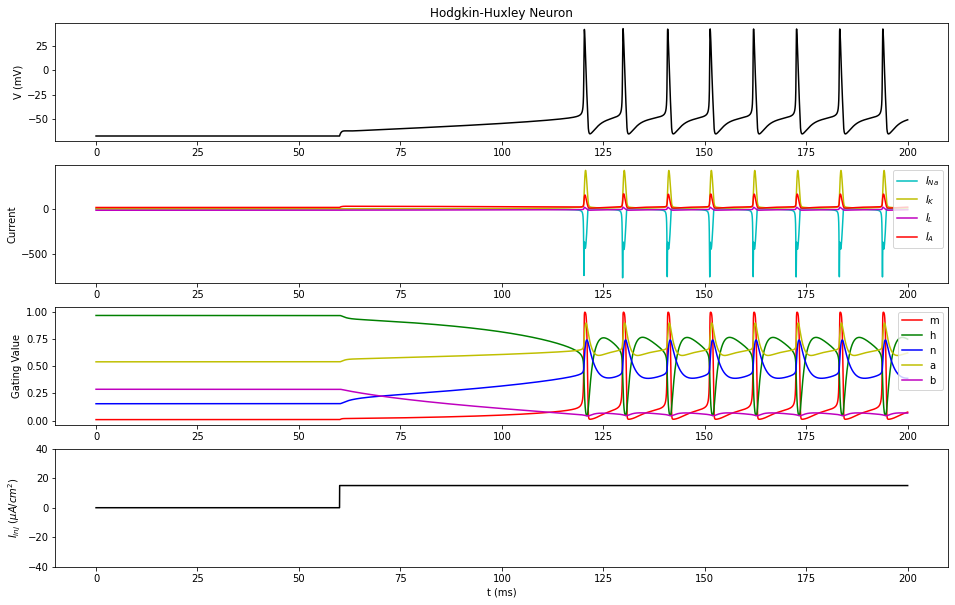

In [11]:
runner = ConnorStevens(exp_time=200)

_ = runner.run(J=[15.0], times=[(60, 200)], V0=-67.976, use_question1_f=True)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<div style="font-family: Times New Roman; font-size: 1.0em;">

<b>Questão 2:</b> <br>

a) Faça um programa que simule o modelo de neurônio de relé talâmico por um perı́odo de
750 ms. Faça o programa de tal forma que você tenha que dar a ele duas entradas: uma
corrente de base e um degrau de corrente. A corrente injetada I inj na equação (7) deve
receber o valor da corrente de base de t = 0 a t = 250 ms. Em t = 250 ms a corrente
injetada I inj deve ser incrementada pelo valor do degrau de corrente e mantida assim até
t = 500 ms. De t = 500 ms a t = 750 ms, a corrente injetada I inj deve voltar ao valor
da corrente de base. Faça seu programa produzir gráficos de V , n, h e h T versus t pelo
tempo de simulação do experimento. <br>
</div>

In [12]:
from Rele_Talamico import ReleTalamico

100%|██████████| 75000/75000 [00:10<00:00, 7015.37it/s]


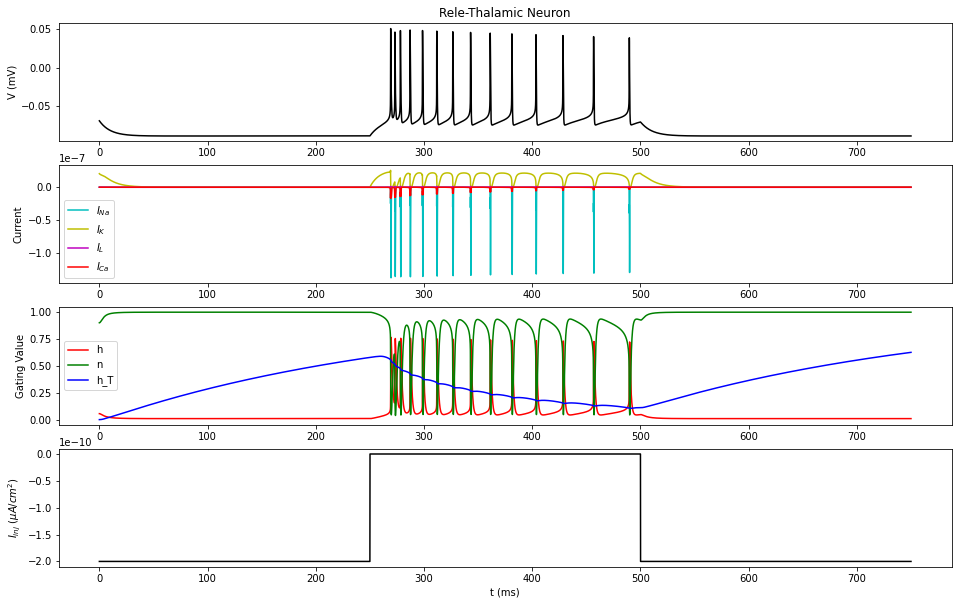

In [13]:
runner = ReleTalamico(exp_time=750)

J_base = -200e-12
J_degrau = 200e-12

_ = runner.run(
    J=[J_base, J_base + J_degrau, J_base], times=[(0, 250), (250, 500), (500, 750)]
)


<div style="font-family: Times New Roman; font-size: 1.0em;">
b) Faça o seu programa gerar um laço (loop) pelos valores da corrente de base (entre −200
pA e +200 pA) e pelos valores do degrau de corrente (entre 0 e +100 pA). A escolha dos
valores usados dentro desses intervalos fica à sua escolha. Para cada par desses valores
(corrente de base e degrau de corrente), calcule o número de disparos emitidos durante
a aplicação do degrau de corrente e, caso dois ou mais disparos sejam emitidos, calcule
o intervalo mı́nimo entre disparos. Usando alguma ferramenta para criar gráficos bi-dimensionais, produza dois diagramas tendo a corrente de base no eixo x e o degrau de
corrente no eixo y. O primeiro diagrama deve mostrar o número de disparos durante a
aplicação do degrau de corrente e o segundo diagrama deve mostrar o intervalo mı́nimo
entre disparos. Analise seus resultados e forneça alguns gráficos das variáveis V, n, h e
h T para cada tipo qualitativamente distinto de comportamento observado <br>
</div>

In [14]:
def find_min_period(times_pot_act, dt):
    """
    Find the minimun period of all potencial actions.

    Parâmetros
    ----------
    times_pot_act: list[int]
        list with all potencial actions times.
    dt: float
        steps used to calculate the numeric solutions.
    """
    min_T = np.inf
    for i in range(1, len(times_pot_act)):
        if times_pot_act[i] - times_pot_act[i - 1] < min_T:
            min_T = times_pot_act[i] - times_pot_act[i - 1]

    return min_T * dt

In [15]:
runner = ReleTalamico(exp_time=750)

J_bases = np.arange(-200e-12, 201e-12, 100e-12)
J_degraus = np.arange(0, 101e-12, 50e-12)
actions = np.zeros(shape=(len(J_bases), len(J_degraus)))
min_periods = np.zeros(shape=(len(J_bases), len(J_degraus)))

for i, J_base in enumerate(J_bases):
    for j, J_degrau in enumerate(J_degraus):
        V, n, h, h_T, ina, ik, ica, il, i_inj_values = runner.run(
            J=[J_base, J_base + J_degrau, J_base],
            times=[(0, 250), (250, 500), (500, 750)],
            plot=False,
        )
        time_potencials, potencials = get_number_of_action_potencial(V)
        actions[i, j] = potencials
        if potencials > 1:
            periodo_min = find_min_period(time_potencials, dt=0.01e-3) * 1000
            min_periods[i, j] = periodo_min

100%|██████████| 75000/75000 [00:09<00:00, 8078.99it/s]


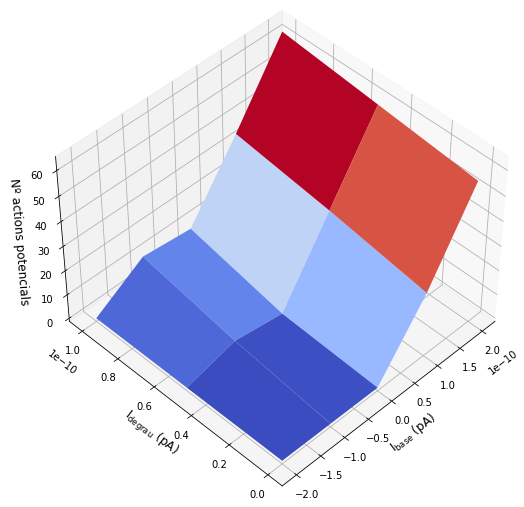

In [16]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8, 7))

X, Y = J_bases, J_degraus
X, Y = np.meshgrid(X, Y)
Z = actions.T

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)

ax.set_xlabel("$\mathrm{I_{base}~(pA)}$", fontsize=12)
ax.set_ylabel("$\mathrm{I_{degrau}~(pA)}$", fontsize=12)
ax.set_zlabel("Nº actions potencials", fontsize=12)

ax.view_init(45, -135)

fig.tight_layout()

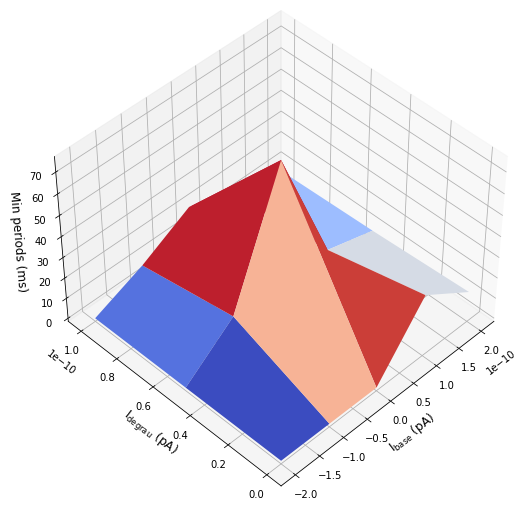

In [17]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8, 7))
Z = min_periods.T

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)

ax.set_xlabel("$\mathrm{I_{base}~(pA)}$", fontsize=12)
ax.set_ylabel("$\mathrm{I_{degrau}~(pA)}$", fontsize=12)
ax.set_zlabel("Min periods (ms)", fontsize=12)

ax.view_init(45, -135)

fig.tight_layout()

Tipos de comportamento observados:

100%|██████████| 75000/75000 [00:10<00:00, 7390.29it/s]


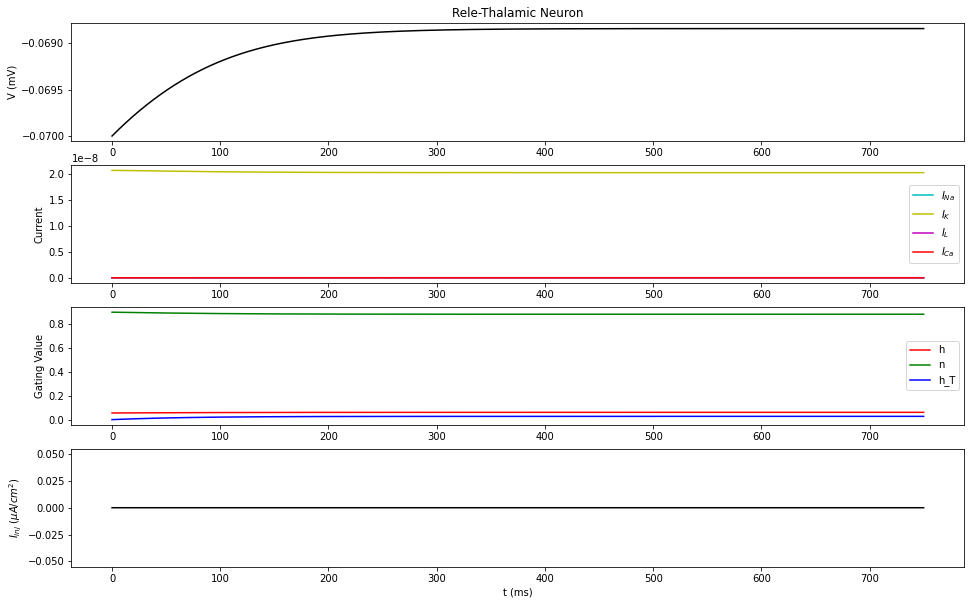

In [18]:
# injeção de corrente sem a geração de potenciais de ação, porém com aumento da voltagem
runner = ReleTalamico(exp_time=750)

_ = runner.run(J=[0], times=[(0, 750)])

100%|██████████| 75000/75000 [00:09<00:00, 8070.59it/s]


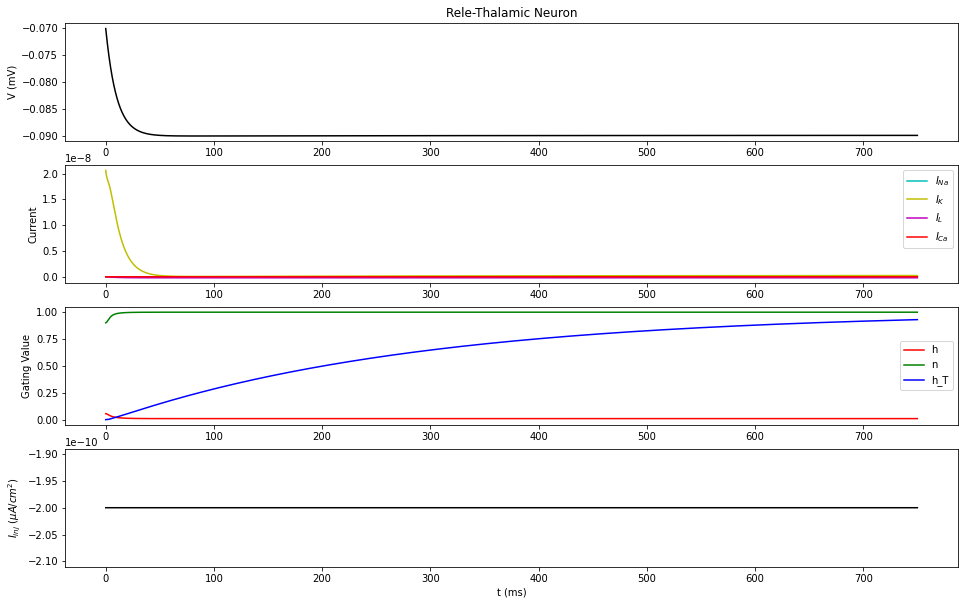

In [19]:
# injeção de corrente sem a geração de potenciais de ação, porém com diminuição da voltagem

_ = runner.run(J=[-200e-12], times=[(0, 750)])

100%|██████████| 75000/75000 [00:09<00:00, 7631.09it/s]


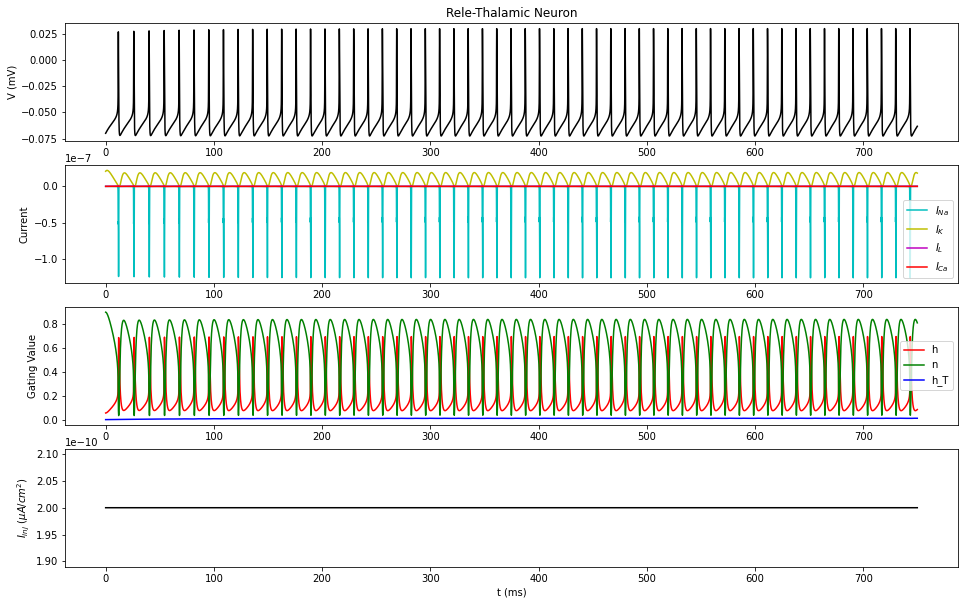

In [20]:
# injeção de corrente com a geração de um trem de potenciais de ação
_ = runner.run(J=[200e-12], times=[(0, 750)])

100%|██████████| 75000/75000 [00:09<00:00, 7551.64it/s]


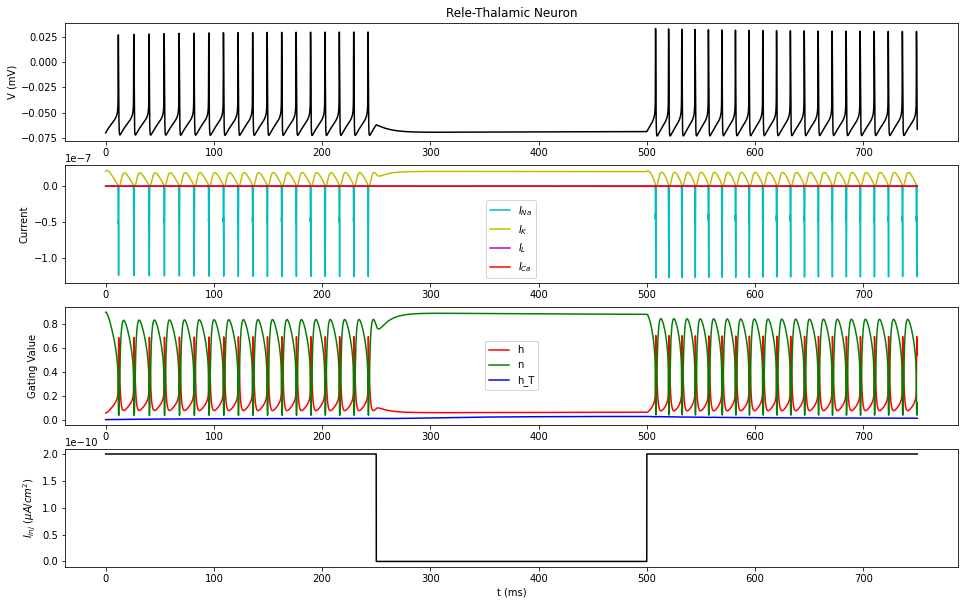

In [21]:
# injeção de corrente interrompida por um período com um corrente menor que inibe a geração de um trem de pontenciais
_ = runner.run(J=[200e-12, 0, 200e-12], times=[(0, 250), (250, 500), (500, 750)])

100%|██████████| 75000/75000 [00:10<00:00, 7120.26it/s]


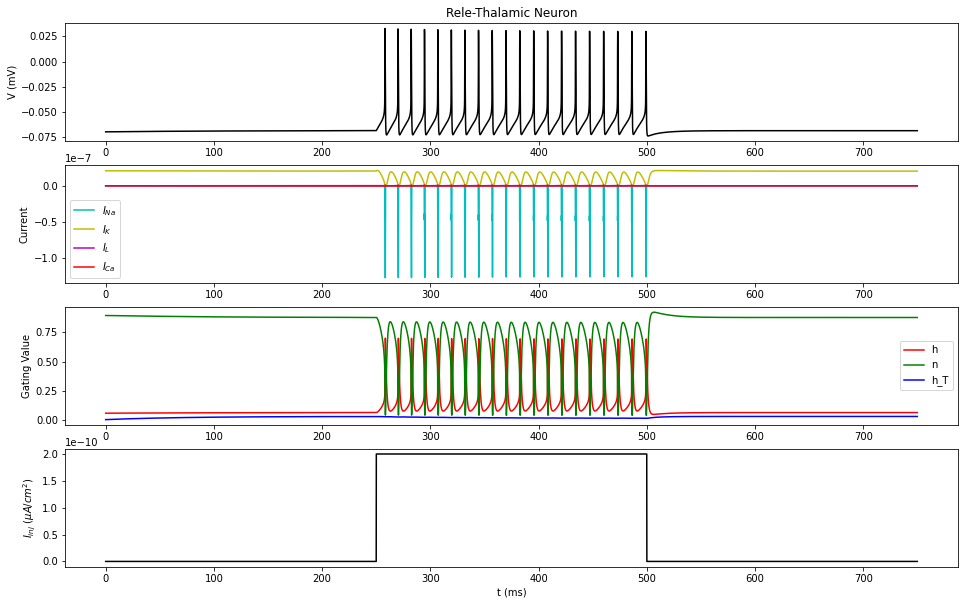

In [22]:
# injeção de corrente por um período menor que gera um trem de pontenciais também
_ = runner.run(J=[0, 200e-12, 0], times=[(0, 250), (250, 500), (500, 750)])

100%|██████████| 75000/75000 [00:10<00:00, 7449.38it/s]


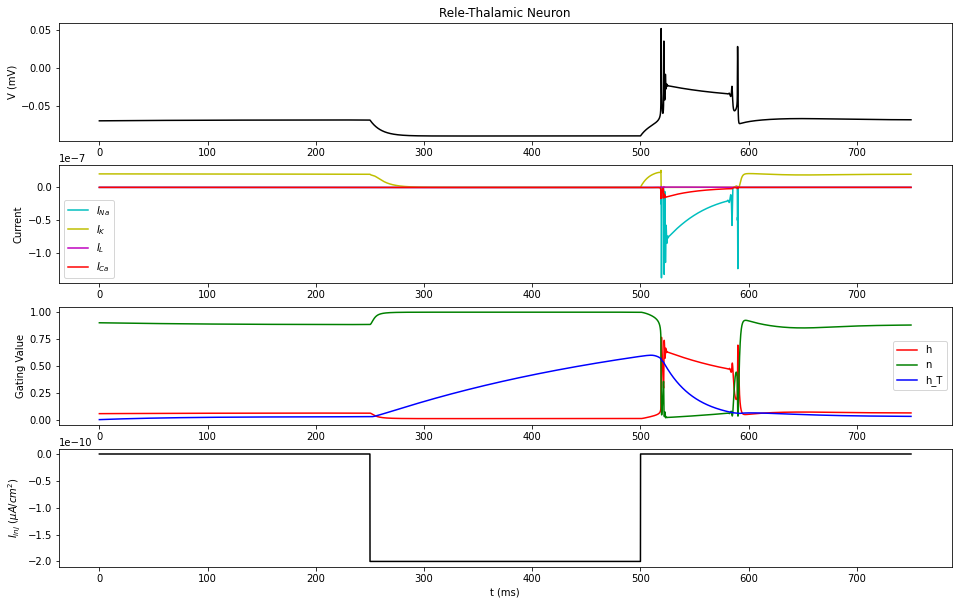

In [23]:
# injeção de corrente negativa capaz de produzir uma hiperpolarização
_ = runner.run(J=[0, -200e-12, 0], times=[(0, 250), (250, 500), (500, 750)])

100%|██████████| 75000/75000 [00:09<00:00, 7632.46it/s]


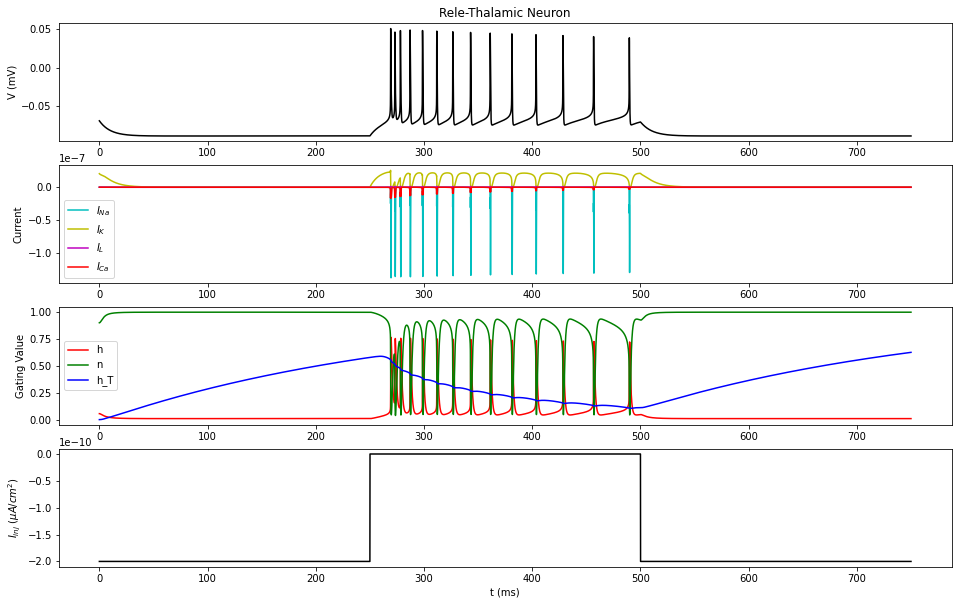

In [24]:
# injeção de corrente negativa capaz de produzir uma hiperpolarização e gerar um trem de disparos
_ = runner.run(J=[-200e-12, 0, -200e-12], times=[(0, 250), (250, 500), (500, 750)])